# World of Warcraft - Battlegrounds EDA & Predition

## 1 Preparing the Data

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')

In [50]:
def my_bar_plot(ax, name, data, x, y, xlabel='', ylabel='', orientation='horizontal',
                palette='Set1', format_spec='{:1.2f}%'):
    ax.set_title(name)
    sns.barplot(x=x, y=y, data=data, ax=ax, palette=palette)
    ax.set(xlabel=xlabel, ylabel=ylabel)
    
    if orientation == 'horizontal':
        for p in ax.patches:
            text = p.get_width()
            ax.text(x=p.get_x() + p.get_width() / 2., 
                y=p.get_y() + p.get_height() * 0.75,
                s=format_spec.format(text),
                ha="center",
                size="small",
                color='white')
        for tick in ax.get_yticklabels():
            tick.set_color(class_colormap[tick.get_text()]) # type: ignore 
    
    elif orientation == 'vertical':
        for p in ax.patches:
            text = p.get_height()
            ax.text(x=p.get_x() + p.get_width() / 2., 
                y=p.get_y() + p.get_height() / 2.,
                s=format_spec.format(text),
                ha="center",
                size="small",
                color='white')
        for tick in ax.get_xticklabels():
            tick.set_color(class_colormap[tick.get_text()]) # type: ignore
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        
def my_confusion_matrix(y_test, y_pred, title):
    from sklearn.metrics import confusion_matrix, accuracy_score
    cm_df = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
                         index=['Alliance', 'Horde'], 
                         columns=['Alliance', 'Horde'])
    plt.figure(figsize=(5.5,4))
    sns.heatmap(cm_df, annot=True, cmap='Blues')
    plt.title(title + '\nAccuracy:{:1.1f}%'.format(accuracy_score(y_test, y_pred) * 100))
    plt.ylabel('True winner')
    plt.xlabel('Predicted winner')
    plt.show()

### Input Files

In [3]:
wowbgs = pd.read_csv('C:/Users/Administrator/Desktop/github_my-learning/my-learning/WoW/data/wowbgs2.csv')
wowgil = pd.read_csv('C:/Users/Administrator/Desktop/github_my-learning/my-learning/WoW/data/wowgil2.csv')
wowtk = pd.read_csv('C:/Users/Administrator/Desktop/github_my-learning/my-learning/WoW/data/wowtk2.csv')
wowsm = pd.read_csv('C:/Users/Administrator/Desktop/github_my-learning/my-learning/WoW/data/wowsm2.csv')
wowwg = pd.read_csv('C:/Users/Administrator/Desktop/github_my-learning/my-learning/WoW/data/wowwg2.csv')

### Data Cleaning

In [4]:
wowbgs.fillna(0, inplace=True)
wowbgs.drop(['Lose'], axis=1, inplace=True)
wowbgs.rename(columns={'Rol':'Role'}, inplace=True)

wowgil.fillna(0, inplace=True)
wowgil.drop(['Lose'], axis=1, inplace=True)
wowgil.rename(columns={'Rol':'Role'}, inplace=True)

wowtk.fillna(0, inplace=True)
wowtk.drop(['Lose'], axis=1, inplace=True)
wowtk.rename(columns={'Rol':'Role'}, inplace=True)

wowsm.fillna(0, inplace=True)
wowsm.drop(['Lose'], axis=1, inplace=True)
wowsm.rename(columns={'Rol':'Role'}, inplace=True)

wowwg.fillna(0, inplace=True)
wowwg.drop(['Lose'], axis=1, inplace=True)
wowwg.rename(columns={'Rol':'Role'}, inplace=True)


bgs_dict = {'AB': 'Arathi Basin',
            'BG': 'Battle for Gilneas',
            'DG': 'Deepwind Gorge',
            'ES': 'Eye of the Storm',
            'SA': 'Strand of the Ancients',
            'SM': 'Silvershard Mines',
            'SS': 'Seething Shore',
            'TK': 'Temple of Kotmogu',
            'TP': 'Twin Peaks',
            'WG': 'Warsong Gulch'}
wowbgs['Battleground'].replace(bgs_dict, inplace=True)


## 2 Exploratory Data Analysis

### General Faction/Class/Player Statistics

In [5]:
print('Dataframe shape:', wowbgs.shape)
print('Information on', len(wowbgs['Code'].unique()), 'matches available.')
wowbgs.head()

Dataframe shape: (5383, 13)
Information on 249 matches available.


,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Role,BE
0,Warsong Gulch,WG1,Horde,Hunter,1,3,14,48155,6641,532,1.0,dps,0.0
1,Warsong Gulch,WG1,Horde,Death Knight,1,3,12,27025,7106,377,1.0,dps,0.0
2,Warsong Gulch,WG1,Alliance,Paladin,0,1,19,824,93879,252,0.0,heal,0.0
3,Warsong Gulch,WG1,Alliance,Paladin,1,2,25,7046,98599,274,0.0,heal,0.0
4,Warsong Gulch,WG1,Alliance,Rogue,2,3,23,65483,19629,268,0.0,dps,0.0


First of all, let's get the general information on roles and classes. Here's faction/class numerical relation (we'll explore this subject further a bit later).

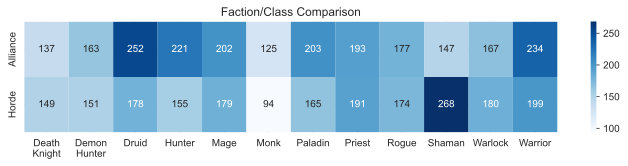

In [6]:
faction_class_mix = wowbgs.pivot_table(values='Honor', 
                                       index='Faction', 
                                       columns='Class', 
                                       aggfunc=lambda x: x.value_counts().count()).astype(int)
faction_class_mix.rename({'Death Knight': 'Death\nKnight', 'Demon Hunter': 'Demon\nHunter'}, axis=1, inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(12, 2))
sns.heatmap(faction_class_mix, annot=True, cmap='Blues', fmt='g', ax=ax)
plt.title('Faction/Class Comparison')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), va='center')
ax.set(ylabel='', xlabel='')
plt.show()

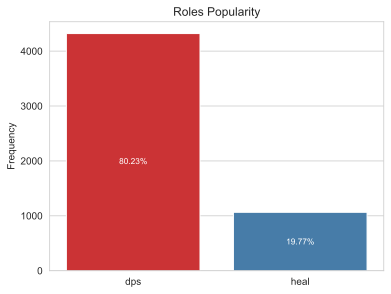

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4.5))
ax.set_title("Roles Popularity")
sns.countplot(x='Role',
              data=wowbgs,
              ax=ax,
              palette='Set1',
              order = wowbgs['Role'].value_counts().index)
ax.set(xlabel='', ylabel='Frequency')

#Adding percentage to the patches
total = float(len(wowbgs))
for p in ax.patches:
    width = p.get_height()
    ax.text(x=p.get_x() + p.get_width()/2., 
              y=p.get_y() + p.get_height()*0.45,
              s='{:1.2f}%'.format(width/total* 100),
              ha="center",
              size="small",
              color='white')   
plt.show()

In [8]:
heal_classes = sorted(list(wowbgs[wowbgs['Role'] == 'heal']['Class'].unique()))
dps_classes = sorted(list(wowbgs[wowbgs['Role'] == 'dps']['Class'].unique()))

print('Healer classes:', *(heal_classes), sep='\n')
print('-' * 12)
print('DPS classes:', *(dps_classes), sep='\n')

Healer classes:
Druid
Monk
Paladin
Priest
Shaman
------------
DPS classes:
Death Knight
Demon Hunter
Druid
Hunter
Mage
Monk
Paladin
Priest
Rogue
Shaman
Warlock
Warrior


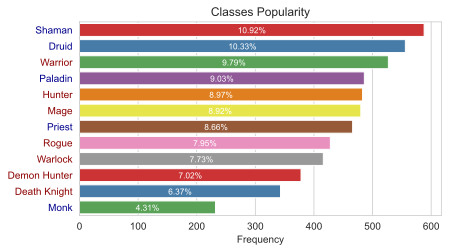

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6.5, 3.5))
ax.set_title("Classes Popularity")
sns.countplot(y='Class',
              data=wowbgs,
              ax=ax,
              palette='Set1',
              order = wowbgs['Class'].value_counts().index)
ax.set(ylabel='', xlabel='Frequency')

#Adding percentage to the patches
total = float(len(wowbgs))
for p in ax.patches:
    width = p.get_width()
    ax.text(x=p.get_x() + p.get_width() / 2., 
              y=p.get_y() + p.get_height() * 0.75,
              s='{:1.2f}%'.format(width/total * 100),
              ha="center",
              size="small",
              color='white')

#Classes names color map
heal_dict, dps_dict = {x: 'darkblue' for x in heal_classes}, {x: 'darkred' for x in dps_classes}
class_colormap = {**dps_dict, **heal_dict}

for tick in ax.get_yticklabels():
    tick.set_color(class_colormap[tick.get_text()])
plt.show()

Let's find out if class popularity correlates with its win rate.

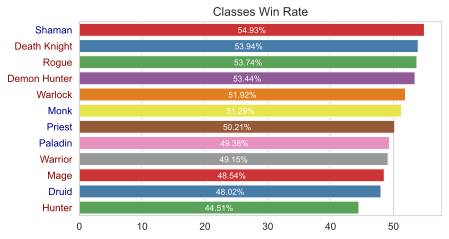

In [10]:
class_winrate = round(wowbgs.groupby(['Class'], as_index=False)['Win'].mean().sort_values(by=['Win'], ascending=False), 4)
class_winrate['Win'] *= 100

fig, ax = plt.subplots(1, 1, figsize=(6.5, 3.5))
my_bar_plot(ax, name="Classes Win Rate", data=class_winrate, x='Win',
            y='Class', orientation='horizontal', format_spec='{:1.2f}%')
plt.show()

Note that in World of Warcraft you can play as DPS on every class, but you got only five options for the healer role. In other words, you can turn your classic healer Paladin into damage dealer one, however, you definitely won't heal your party as a Demon Hunter. Let's check what role is actually preferred on each of the healer classes.

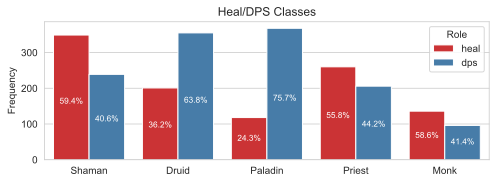

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 2.5))
ax.set_title("Heal/DPS Classes")
sns.countplot(x='Class',
              hue='Role',
              data=wowbgs[wowbgs['Class'].isin(heal_classes)],
              ax=ax,
              palette='Set1',
              order=wowbgs[wowbgs['Class'].isin(heal_classes)]['Class'].value_counts().index)
ax.set(ylabel='Frequency', xlabel='')

dps_patches = ax.patches[:5]
heal_patches = ax.patches[5:]
patches = list(zip(dps_patches, heal_patches ))

for p in patches:
    height = [p[i].get_height() for i in range(2)]
    total = sum(height)
    for i in range(2):
        ax.text(x=p[i].get_x() + p[i].get_width() / 2., 
              y=p[i].get_y() + p[i].get_height() * 0.45,
              s='{:1.1f}%'.format(height[i] / total * 100),
              ha="center",
              size="small",
              color='white')
    
plt.show()

Interestingly enough, when it comes to Battlegrounds, there isn't really a highly specialized healer class since DPS role is quite popular among them as well. However, as we'll see later, your actual perfomance on "non-native" role won't be astounding. What this basically means is that you are more of less forced to switch to DPS as a healer class to get more Honor. Moving on to class perfomance statistics...

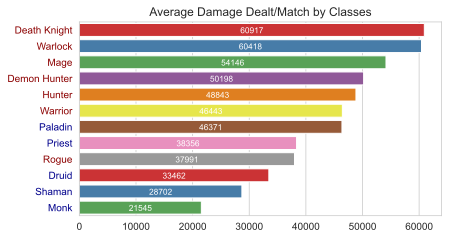

In [12]:
mean_dd = round(wowbgs.groupby(['Class'], as_index=False)['DD'].mean().sort_values(by=['DD'], ascending=False))

fig, ax = plt.subplots(1, 1, figsize=(6.5, 3.5))
my_bar_plot(ax, name="Average Damage Dealt/Match by Classes", data=mean_dd, x='DD',
            y='Class', orientation='horizontal', format_spec='{:1.0f}')
plt.show()

Surprisingly, Paladin and Priest deal more damage than Rogue on the average. I suppose the reason is that Rogue isn't that type of guy who's always in the middle of the fight but rather prefers sneaking behind the enemy lines hunting for healers and range damage dealers. Let's compare damage output with Kills and Assists statistics.

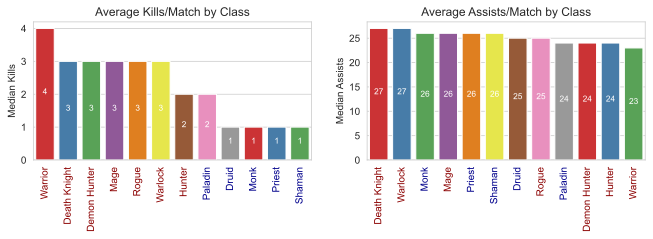

In [13]:
median_kb = round(wowbgs.groupby(['Class'], as_index=False)['KB'].median().sort_values(by=['KB'], ascending=False))
median_hk = round(wowbgs.groupby(['Class'], as_index=False)['HK'].median().sort_values(by=['HK'], ascending=False))

fig, axs = plt.subplots(1, 2, figsize=(11, 2.5))
my_bar_plot(axs[0], name="Average Kills/Match by Class", data=median_kb, x='Class',
            y='KB', ylabel='Median Kills', orientation='vertical', format_spec='{:1.0f}')
my_bar_plot(axs[1], name="Average Assists/Match by Class", data=median_hk, x='Class',
            y='HK', ylabel='Median Assists', orientation='vertical', format_spec='{:1.0f}')
plt.show()

You actually shouldn't consider Kills or, to be more precise, Killing Blows way too serious. Keep in mind that we are talking about large teamfights where your mates could do 95% of the work only to have you land the final blow and take all the glory. Assists, or HK, on the contrary, is an important feature showing your overall participation in the match. Also, as we can see that Assists values are distributed rather equally. What this probably means is that healers get assists from healing their teammates getting the Killing Blows.

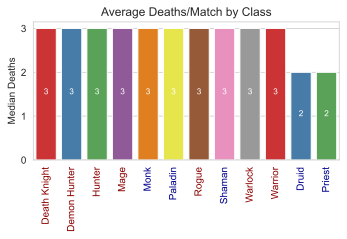

In [14]:
median_d = round(wowbgs.groupby(['Class'], as_index=False)['D'].median().sort_values(by=['D'], ascending=False))

fig, ax = plt.subplots(1, 1, figsize=(5.5, 2.5))
my_bar_plot(ax, name="Average Deaths/Match by Class", data=median_d, x='Class',
            y='D', ylabel='Median Deaths', orientation='vertical', format_spec='{:1.0f}')
plt.show()

No dramatic difference in terms of Deaths of classes, though you'd probably feel abit safer on Priest and Druid. Now, what about healing? Who's the best on this role?

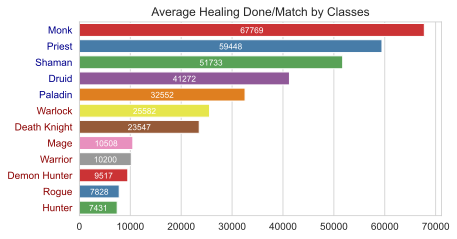

In [15]:
mean_hd = round(wowbgs.groupby(['Class'], as_index=False)['HD'].mean().sort_values(by=['HD'], ascending=False))

fig, ax = plt.subplots(1, 1, figsize=(6.5, 3.5))
my_bar_plot(ax, name="Average Healing Done/Match by Classes", data=mean_hd, x='HD',
            y='Class', orientation='horizontal', format_spec='{:1.0f}')
plt.show()

Monk and Priest heal the most despite the fact that they are not the most played healer classes nor the most winning. Paladin being on the bottom of healers list pretty much explains why the DPS role is way more preferred for him.

See the distributions for Damage Dealt (DD) and Healing Done (HD) for the average damage/healing output overall.

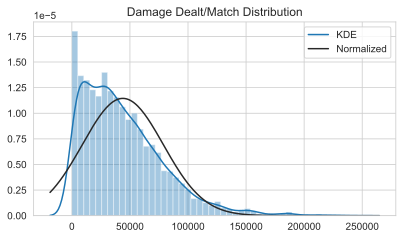

In [16]:
from scipy.stats import norm
fig, ax = plt.subplots(1, 1, figsize=(6.5, 3.5))
ax.set_title("Damage Dealt/Match Distribution")
sns.distplot(wowbgs['DD'],
             fit=norm,
             ax=ax,
             kde_kws={'label': 'KDE'},
             fit_kws={'label': 'Normalized'})
ax.set(ylabel='', xlabel='')
plt.legend()
plt.show()

And finally, let's have a look at the correlation for all player's statistics.

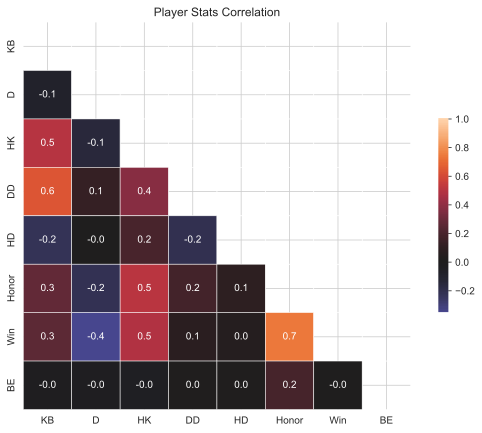

In [17]:
np.bool = np.bool_
corr = wowbgs.corr(method='pearson', numeric_only=True)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10,7))
ax.set_title("Player Stats Correlation")
sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
plt.show()

Note that this correlation map is for individual player perfomance, not the team one. So, as we can see, your personal damage or heal output itself is not a determining factor for the match outcome - but your Kills and Assists, obviously, depend on it. Assists (HK), as already mentioned, represent the team work here and they contribute to the victory more than your personal killstreak.

You can also get the idea of how the Honor system works. Match outcome is crucial for the amount of points you are going to get. Check the chart below, and you will clearly see the actual threshold between 100% lose and 100% win based on the amount of Honor you've gained. This border will be even more dramatic if we sum up the Honor per match for each team. With this in mind, we will have to drop Honor, because it leaves no room for research, more or less telling the result.

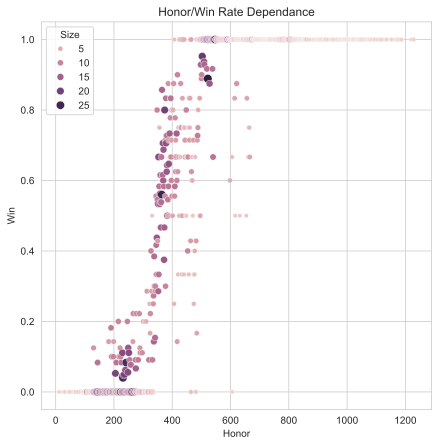

In [18]:
honor_df = wowbgs.groupby(['Honor'], as_index=False)['Win'].mean()
honor_df['Size'] = np.array(wowbgs.groupby(['Honor'])['Win'].count())

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.set_title("Honor/Win Rate Dependance")
sns.scatterplot(x="Honor", y="Win", data=honor_df, ax=ax, hue="Size", size="Size")
plt.show()

### Team Statistics

Now, let's reconstruct our dataset for the match outcome prediction problem we want to solve.

In [19]:
class_names = sorted(wowbgs['Class'].unique())
matches_num = len(wowbgs['Code'].unique())

team_stats = ['DPS', 'Healers', 'Kills', 'Deaths', 'Assists', 'Damage', 'Healing']
wowbgs.rename(columns={'KB': 'Kills', 'D': 'Deaths', 'HK': 'Assists', 'DD': 'Damage', 'HD': 'Healing'}, inplace=True)
wowbgs['DPS'] = (wowbgs['Role'] == 'dps').astype(int)
wowbgs['Healers'] = (wowbgs['Role'] == 'heal').astype(int)
wowbgs.drop(['Role', 'Honor', 'BE'], axis=1, inplace=True)
wowbgs = pd.get_dummies(wowbgs, columns=['Class'])
for name in class_names:
    wowbgs.rename(columns={'Class_' + name: name}, inplace=True)

matches_columns = ['Battleground']
for faction in ['Alliance', 'Horde']:
    matches_columns += [faction + ' ' + name for name in class_names]
    matches_columns += [faction + ' ' + stat for stat in team_stats]

matches = pd.DataFrame(columns=matches_columns, index=range(matches_num))

matches['Battleground'] = np.array(wowbgs.groupby(['Code'])['Battleground'].first())
matches['Alliance Won'] = np.array(wowbgs[wowbgs['Faction'] == 'Alliance'].groupby(['Code'])['Win'].first().astype(int))
for faction in ['Alliance', 'Horde']:
    for stat in team_stats:
        matches[faction +' '+ stat] = np.array(wowbgs[wowbgs['Faction'] == faction].groupby(['Code'])[stat].sum())
    for name in class_names:
        matches[faction +' '+ name] = np.array(wowbgs[(wowbgs['Faction'] == faction)].groupby(['Code'])[name].sum())
matches.iloc[:,1:] = matches.iloc[:,1:].astype(int)

print('New dataset size:', matches.shape)
print('-'*27)
print('New features list:', *(matches.columns), sep='\n')
matches.head()

New dataset size: (249, 40)
---------------------------
New features list:
Battleground
Alliance Death Knight
Alliance Demon Hunter
Alliance Druid
Alliance Hunter
Alliance Mage
Alliance Monk
Alliance Paladin
Alliance Priest
Alliance Rogue
Alliance Shaman
Alliance Warlock
Alliance Warrior
Alliance DPS
Alliance Healers
Alliance Kills
Alliance Deaths
Alliance Assists
Alliance Damage
Alliance Healing
Horde Death Knight
Horde Demon Hunter
Horde Druid
Horde Hunter
Horde Mage
Horde Monk
Horde Paladin
Horde Priest
Horde Rogue
Horde Shaman
Horde Warlock
Horde Warrior
Horde DPS
Horde Healers
Horde Kills
Horde Deaths
Horde Assists
Horde Damage
Horde Healing
Alliance Won


,Battleground,Alliance Death Knight,Alliance Demon Hunter,Alliance Druid,Alliance Hunter,Alliance Mage,Alliance Monk,Alliance Paladin,Alliance Priest,Alliance Rogue,...,Horde Warlock,Horde Warrior,Horde DPS,Horde Healers,Horde Kills,Horde Deaths,Horde Assists,Horde Damage,Horde Healing,Alliance Won
0,Arathi Basin,1,1,3,0,3,1,0,1,1,...,1,1,10,5,21,53,188,880817,750061,1
1,Arathi Basin,0,0,1,1,4,0,1,0,2,...,0,2,12,3,59,24,547,613840,460354,0
2,Arathi Basin,1,0,0,1,2,4,1,1,2,...,0,1,10,5,69,29,723,915141,818395,0
3,Arathi Basin,2,0,3,2,1,0,0,0,2,...,1,4,12,3,48,93,356,1152620,775736,0
4,Arathi Basin,1,0,1,2,1,0,3,3,1,...,0,0,10,4,51,20,450,575465,518226,0


In [20]:

    
wowbgs

,Battleground,Code,Faction,Kills,Deaths,Assists,Damage,Healing,Win,DPS,...,Druid,Hunter,Mage,Monk,Paladin,Priest,Rogue,Shaman,Warlock,Warrior
0,Warsong Gulch,WG1,Horde,1,3,14,48155,6641,1.0,1,...,False,True,False,False,False,False,False,False,False,False
1,Warsong Gulch,WG1,Horde,1,3,12,27025,7106,1.0,1,...,False,False,False,False,False,False,False,False,False,False
2,Warsong Gulch,WG1,Alliance,0,1,19,824,93879,0.0,0,...,False,False,False,False,True,False,False,False,False,False
3,Warsong Gulch,WG1,Alliance,1,2,25,7046,98599,0.0,0,...,False,False,False,False,True,False,False,False,False,False
4,Warsong Gulch,WG1,Alliance,2,3,23,65483,19629,0.0,1,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5378,Temple of Kotmogu,TK40,Horde,3,0,47,19154,2611,1.0,1,...,False,False,False,False,False,False,False,True,False,False
5379,Temple of Kotmogu,TK40,Alliance,1,4,12,26117,11492,0.0,1,...,False,False,True,False,False,False,False,False,False,False
5380,Temple of Kotmogu,TK40,Alliance,2,4,9,39954,9699,0.0,1,...,False,False,False,False,False,False,False,False,False,False
5381,Temple of Kotmogu,TK40,Alliance,4,6,9,54729,20736,0.0,1,...,False,False,False,False,True,False,False,False,False,False


Here is one curious observation.

In [21]:
print('Is Alliance Kills number always equal to Horde Deaths number?',
      (matches['Alliance Kills'] == matches['Horde Deaths']).all())
print('Is Horde Kills number always equal to Alliance Deaths number?',
      (matches['Alliance Kills'] == matches['Horde Deaths']).all())

Is Alliance Kills number always equal to Horde Deaths number? False
Is Horde Kills number always equal to Alliance Deaths number? False


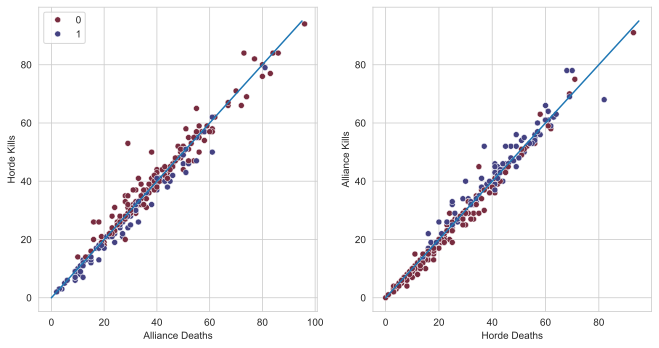

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(11, 5.5))
sns.scatterplot(ax=axs[0], x="Alliance Deaths", y="Horde Kills",
                hue="Alliance Won", data=matches, palette='icefire_r')
y = x = np.linspace(0, 95)
sns.lineplot(x=x, y=x, ax=axs[0])
sns.scatterplot(ax=axs[1], x="Horde Deaths", y="Alliance Kills",
                hue="Alliance Won", data=matches, palette="icefire_r", legend=False)
sns.lineplot(x=x, y=x, ax=axs[1])
plt.show()

So, Faction A Deaths > Faction B Kills would make some sense, as you could've died jumping from the cliff as well, but Faction A Deaths < Faction B Kills is really weird. More importantly, the data is very unbalanced in terms of these two features, so we can't just drop a few outliners or even drop Deaths columns for each side assuming that it more or less equals other side's Kills. Unfortunately, I'm not familiar with WoW Battlegrounds mechanics, so the only explanation I could come up with is the situation where you are killed, your kiler got his Killing Blow counted, however, your healer resurrects you, so you actually don't get your Death counted.

Some general matches statistics:

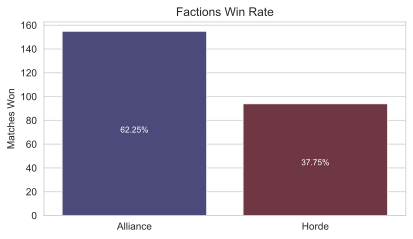

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(6.5, 3.5))
ax.set_title("Factions Win Rate")
sns.countplot(x='Alliance Won',
              data=matches,
              ax=ax,
              palette='icefire')
ax.set(xlabel='', ylabel='Matches Won')

total = float(len(matches))
for p in ax.patches:
    width = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2., 
              y=p.get_y() + p.get_height() * 0.45,
              s='{:1.2f}%'.format(width/total * 100),
              ha="center",
              size="small",
              color='white')
plt.xticks(range(2), ('Alliance', 'Horde'))
plt.show()

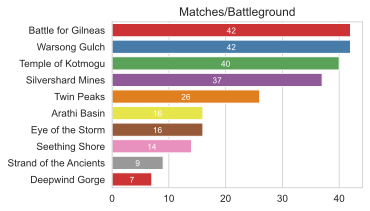

In [24]:
bgs_matches = pd.DataFrame(columns=['Battleground, Matches'])
bgs_matches['Battleground'] = matches.groupby(['Battleground']).count().iloc[:,0].sort_values(ascending=False).index
bgs_matches['Matches'] = np.array(matches.groupby(['Battleground']).count().iloc[:,0].sort_values(ascending=False))

fig, ax = plt.subplots(1, 1, figsize=(4.5, 3))
ax.set_title('Matches/Battleground')
sns.barplot(x='Matches',
            y='Battleground',
            data=bgs_matches,
            ax=ax,
            palette='Set1')
ax.set(xlabel='', ylabel='')
for p in ax.patches:
    width = p.get_width()
    ax.text(x=p.get_x() + p.get_width() / 2., 
    y=p.get_y() + p.get_height() * 0.75,
    s='{:.0f}'.format(width),
    ha="center",
    size="small",
    color='white')
plt.show()

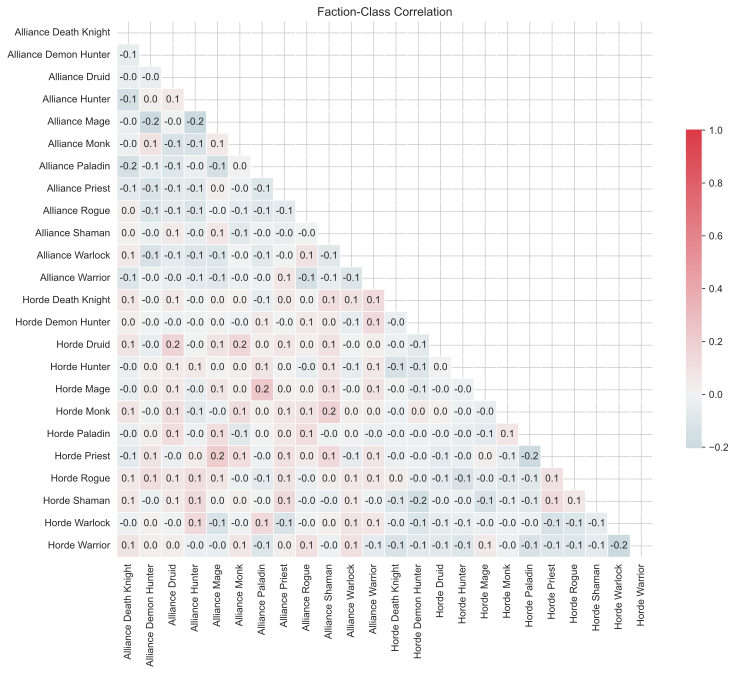

In [25]:
class_columns = []
for faction in ['Alliance', 'Horde']:
    for name in class_names:
        class_columns += [faction + ' ' + name]
        
classes_corr = matches[class_columns]
corr = classes_corr.corr(method='pearson', numeric_only=True)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

_, ax = plt.subplots(figsize=(12,11.5))
ax.set_title("Faction-Class Correlation")
cmap = sns.diverging_palette(220, 10, as_cmap = True )
sns.heatmap(corr, cmap = cmap, mask=mask, vmax=1, center=0,
            annot=True, fmt='.1f', square=True, linewidths=.5,
            cbar_kws={"shrink": .5});
plt.show()

What knowledge can we gain from this large table? Well, let's say you are playing as Horde Paladin. Then you aren't likely to fight side by side with Horde Priest, who is a mainly healer class just like you. However, be ready to face Alliance Mage and Alliance Druid.

Generally speaking, we should be cautious with our conclusion as the sample we are given is quite small and we got information on merely 250 matches.

## 3 Winner Prediction 

In [124]:
from sklearn.model_selection import train_test_split

matches['Battleground'] = pd.factorize(matches['Battleground'])[0]
np.random.seed(42)
matches = matches.sample(frac=1, random_state=40)
df_train, df_test = train_test_split(matches, test_size=0.3)

print('Dataset divided')
print('Train sample size:', len(df_train), 'matches |', '{:d}%'.format(round(len(df_train) / len(matches) * 100)))
print('Train sample size:', len(df_test), 'matches  |', '{:d}%'.format(round(len(df_test) / len(matches) * 100)))

Dataset divided
Train sample size: 174 matches | 70%
Train sample size: 75 matches  | 30%


In [125]:
X_train = df_train.drop(['Alliance Won'], axis=1)
y_train = df_train['Alliance Won'].values
X_test = df_test.drop(['Alliance Won'], axis=1)
y_test = df_test['Alliance Won'].values

### First Try

Now, what model should we pick? There are so many to choose from... But do we really need to think about it, when we got that nice XGBoost? It will surely handle this task with no extra work required from us. That's how Data Science works, right?

Well, there is still one nasty problem called 'hyperparameters optimization'. GridSearch is an option, of course, but I bet you don't want to wait forever, so let's try RandomizedSearch instead.

In [127]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(tree_method='auto')

param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_depth': [1, 3, 5, 7, 12, 15],
    'learning_rate': [1e-1, 1e-2, 1e-3, 1e-4],
    'gamma': [0, 0.5, 1, 5],
    'reg_alpha': [0.1, 0.25, 0.5],
    'reg_lambda': [0.1, 0.25, 0.5]
}

folds = 3
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 40)

In [128]:
random_search = RandomizedSearchCV(xgb, param_distributions=param_grid,
                                   n_iter=param_comb, scoring='roc_auc',
                                   n_jobs=-1, cv=skf.split(X_train,y_train),
                                   verbose=3, random_state=40)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000001C28F65D7E0>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'gamma': [0, 0.5, 1, 5],
                                        'learning_rate': [0.1, 0.01, 0.001,
                                                          0.0001],
                                        'max_depth': [1, 3, 5, 7, 12, 15],
                                        'n_estimators': [50, 100, 200, 500,
                                                         1000],
                                        'reg_alpha': [0.1, 0.25, 0.5],
                                        'reg_lambda': [0.1, 0.25, 0.5]},
                   random_state=40, scoring='roc_auc', verbose=3)

In [129]:
print('XGB model best hyperparameters:')
print(random_search.best_params_)
print('XGB model best cross-validation score:')
print(random_search.best_score_)

XGB model best hyperparameters:
{'reg_lambda': 0.25, 'reg_alpha': 0.1, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 5}
XGB model best cross-validation score:
0.8572227302490459


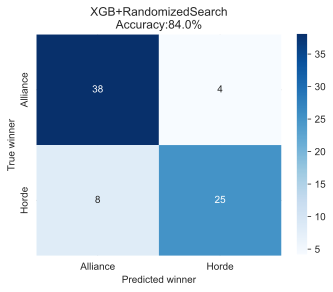

In [130]:
y_pred = random_search.predict(X_test)
my_confusion_matrix(y_test, y_pred, 'XGB+RandomizedSearch')

### Meet the Hyperopt

84% accuracy is not that bad for a random search, but what about more meaningful approach? Well, there is one, called Hyperopt. If you are not familiar with it, be sure to check this great tutorial first.

In [142]:
from hyperopt import fmin, hp, tpe, Trials, space_eval
from sklearn.model_selection import KFold, cross_val_score

space={
       'n_estimators': hp.quniform('n_estimators', 1, 500, 50),
       'max_depth' : hp.quniform('max_depth', 2, 20, 1),
       'reg_alpha':  hp.uniform('reg_alpha', 0.01, 0.9),
       'reg_lambda': hp.uniform('reg_lambda', 0.1, 1.0),
       'learning_rate': hp.loguniform('learning_rate', 1e-4, 0.3),
       'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
       'gamma': hp.uniform('gamma', 0.0, 5.0),
       'num_leaves': hp.choice('num_leaves', list(range(2, 15))),       
       'min_child_samples': hp.choice('min_child_samples', list(range(2, 10))),
       'feature_fraction': hp.choice('feature_fraction', [.5, .6, .7, .8, .9]),
       'bagging_fraction': hp.choice('bagging_fraction', [.5, .6, .7, .8, .9])
      }

# trials will contain logging information
trials = Trials()
num_folds=5
kf = KFold(n_splits=num_folds, random_state=40, shuffle=True)

In [143]:
from sklearn.model_selection import cross_val_score
def xgb_cv(params, random_state=40, cv=kf, X=X_train, y=y_train):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'gamma': "{:.3f}".format(params['gamma']),
        'reg_alpha': "{:.3f}".format(params['reg_alpha']),
        'learning_rate': "{:.3f}".format(params['learning_rate']),
        'gamma': "{:.3f}".format(params['gamma']),
        'num_leaves': '{:.3f}'.format(params['num_leaves']),
        'min_child_samples': '{:.3f}'.format(params['min_child_samples']),
        'feature_fraction': '{:.3f}'.format(params['feature_fraction']),
        'bagging_fraction': '{:.3f}'.format(params['bagging_fraction'])
    }
    model = XGBClassifier(**params, tree_method='auto', random_state=40)
    score = -cross_val_score(model, X, y, cv=cv, scoring="roc_auc", n_jobs=-1).mean()
    return score

In [144]:
%%time
best=fmin(fn=xgb_cv,
          space=space, 
          algo=tpe.suggest,
          max_evals=35,
          trials=trials,
          rstate=np.random.default_rng(40)
         )
best['max_depth'] = int(best['max_depth'])
best['n_estimators'] = int(best['max_depth'])

100%|██████████| 35/35 [00:05<00:00,  6.08trial/s, best loss: -0.8887553596746767]
CPU times: total: 1.7 s
Wall time: 5.77 s


In [145]:
#Hyperopt log in hidden cell
print(*(trials.results), sep='\n')

{'loss': -0.8447811256844056, 'status': 'ok'}
{'loss': -0.5, 'status': 'ok'}
{'loss': -0.8509081157596728, 'status': 'ok'}
{'loss': -0.8745708234747049, 'status': 'ok'}
{'loss': -0.8613071716107973, 'status': 'ok'}
{'loss': -0.8628830358648922, 'status': 'ok'}
{'loss': -0.855636395548687, 'status': 'ok'}
{'loss': -0.5, 'status': 'ok'}
{'loss': -0.8604294737657907, 'status': 'ok'}
{'loss': -0.8277576892742683, 'status': 'ok'}
{'loss': -0.8483289782130011, 'status': 'ok'}
{'loss': -0.8701183532329463, 'status': 'ok'}
{'loss': -0.8537253958267799, 'status': 'ok'}
{'loss': -0.8729664710897147, 'status': 'ok'}
{'loss': -0.8417151615447388, 'status': 'ok'}
{'loss': -0.8841182497458412, 'status': 'ok'}
{'loss': -0.5, 'status': 'ok'}
{'loss': -0.8244681323540808, 'status': 'ok'}
{'loss': -0.8608885115636584, 'status': 'ok'}
{'loss': -0.8791940073215987, 'status': 'ok'}
{'loss': -0.8795727952003866, 'status': 'ok'}
{'loss': -0.8782648367228779, 'status': 'ok'}
{'loss': -0.8795727952003866, 'sta

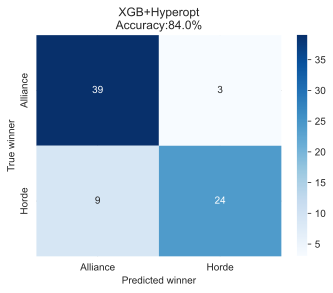

In [146]:
model_2 = XGBClassifier(**best, tree_method='auto') # type: ignore
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)
my_confusion_matrix(y_test, y_pred_2, 'XGB+Hyperopt')

## 4 Model Analysis

Alright, so XGBoost has given us rather decent result, and we don't get any increase in accuracy with Hyperopt. If we compare our prediction accuracy to CV accuracy, we'll see that they correlate quite well with each other, which is a reassuring observation. Nevertheless, the errors pattern remains. There are some matches which consistently get missclassified, and I bet these are some special cases that we have to investigate. First of all, let's check the feature importances judged by XGBClassifier.

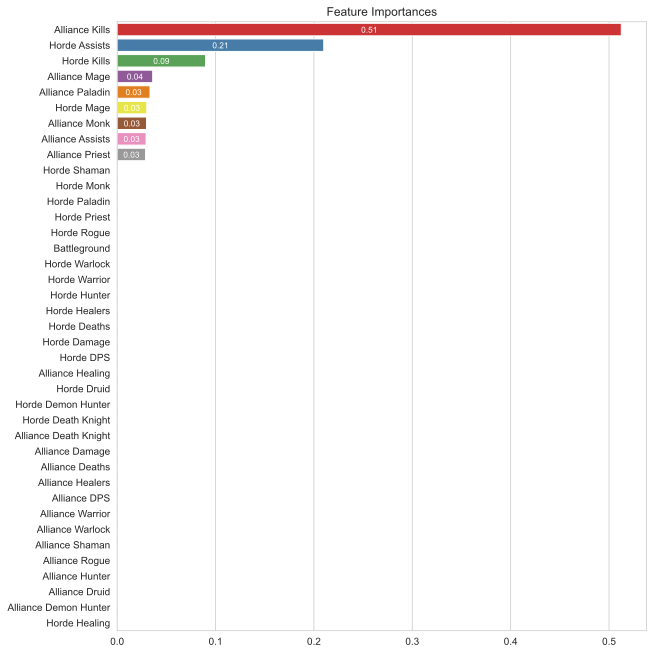

In [150]:
feature_importances = pd.DataFrame(columns=['Feature', 'Importance'])
feature_importances['Feature'] = df_train.iloc[:,:-1].columns
feature_importances['Importance'] = np.array(model_2.feature_importances_)
feature_importances = feature_importances.sort_values(by=['Importance'], ascending=False).reset_index(drop=True)

fig, ax = plt.subplots(1, 1, figsize=(9.5, 11))
ax.set_title('Feature Importances')
sns.barplot(x='Importance',
            y='Feature',
            data=feature_importances,
            ax=ax,
            palette='Set1')
ax.set(xlabel='', ylabel='')
for p in ax.patches:
    width = p.get_width()
    if width < 0.01:
        continue
    ax.text(x=p.get_x() + p.get_width() / 2., 
    y=p.get_y() + p.get_height() * 0.75,
    s='{:.2f}'.format(width),
    ha="center",
    size="small",
    color='white')
plt.show()

Kills being of the top of the list is no surprise, what's interesting is that our model deemed some Faction-Class features to be very important, in fact, more important than overall team Damage of Healing output, or the team composition (DPS / Healers). And those classes themselves - Mage, Priest or Paladin - aren't the greatest healers of damage dealers (see the above charts on classes perfomance). You'd expect team Kills/Assists/Damage/Healing to have the most weight. Let's explore them.

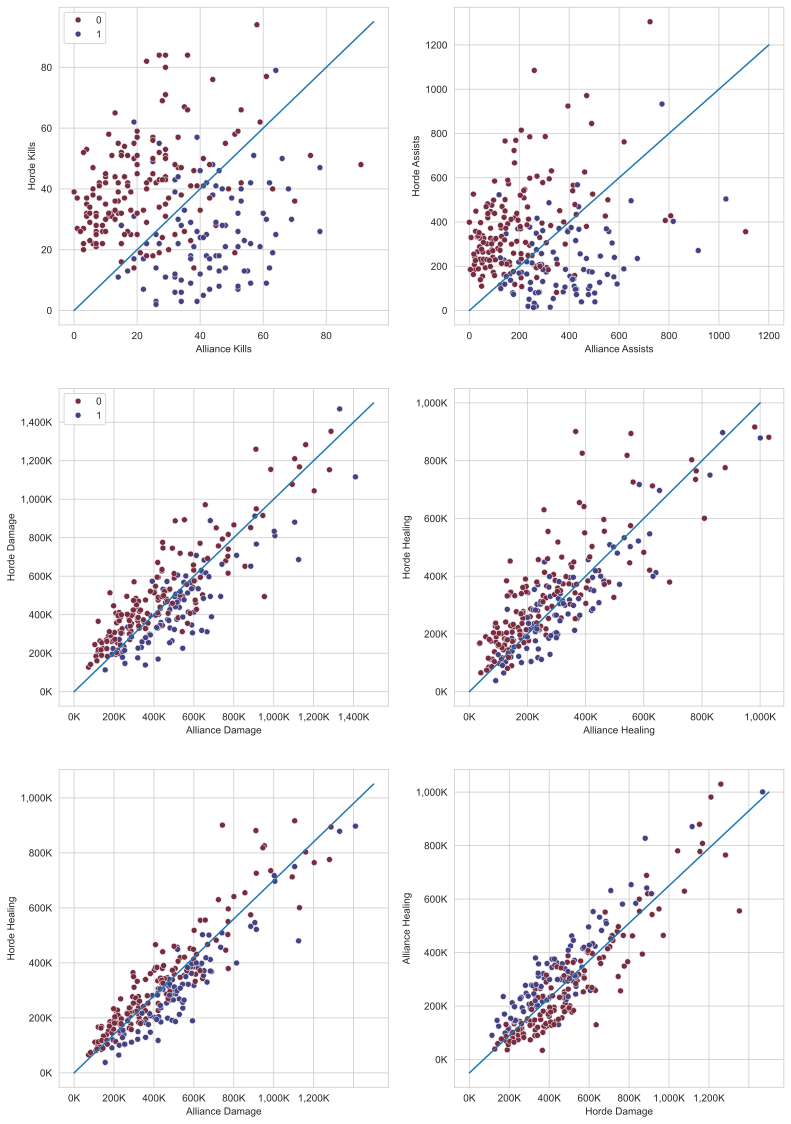

In [148]:
fig, axs = plt.subplots(3, 2, figsize=(13, 19.5))

sns.scatterplot(ax=axs[0, 0], x="Alliance Kills", y="Horde Kills",
                hue="Alliance Won", data=matches, palette='icefire_r')
y = x = np.linspace(0, 95)
sns.lineplot(x=x, y=x, ax=axs[0, 0])

sns.scatterplot(ax=axs[0, 1], x="Alliance Assists", y="Horde Assists",
                hue="Alliance Won", data=matches, palette="icefire_r", legend=False)
y = x = np.linspace(0, 1200)
sns.lineplot(x=x, y=x, ax=axs[0, 1])

sns.scatterplot(ax=axs[1, 0], x="Alliance Damage", y="Horde Damage",
                hue="Alliance Won", data=matches, palette='icefire_r')
y = x = np.linspace(0, 1.5 * (10 ** 6))
sns.lineplot(x=x, y=x, ax=axs[1, 0])
xlabels = ['{:,.0f}'.format(x) + 'K' for x in axs[1, 0].get_xticks() / 1000]
ylabels = ['{:,.0f}'.format(x) + 'K' for x in axs[1, 0].get_yticks() / 1000]
axs[1, 0].set_xticklabels(xlabels)
axs[1, 0].set_yticklabels(ylabels)

sns.scatterplot(ax=axs[1, 1], x="Alliance Healing", y="Horde Healing",
                hue="Alliance Won", data=matches, palette="icefire_r", legend=False)
y = x = np.linspace(0, 1e6)
sns.lineplot(x=x, y=x, ax=axs[1, 1])
xlabels = ['{:,.0f}'.format(x) + 'K' for x in axs[1, 1].get_xticks() / 1000]
ylabels = ['{:,.0f}'.format(x) + 'K' for x in axs[1, 1].get_yticks() / 1000]
axs[1, 1].set_xticklabels(xlabels)
axs[1, 1].set_yticklabels(ylabels)

sns.scatterplot(ax=axs[2, 0], x="Alliance Damage", y="Horde Healing",
                hue="Alliance Won", data=matches, palette="icefire_r", legend=False)
y = x = np.linspace(0, 1.5 * 10**6)
sns.lineplot(x=x, y=0.7 * x, ax=axs[2, 0])
xlabels = ['{:,.0f}'.format(x) + 'K' for x in axs[1, 1].get_xticks() / 1000]
ylabels = ['{:,.0f}'.format(x) + 'K' for x in axs[1, 1].get_yticks() / 1000]
axs[2, 0].set_xticklabels(xlabels)
axs[2, 0].set_yticklabels(ylabels)

sns.scatterplot(ax=axs[2, 1], x="Horde Damage", y="Alliance Healing",
                hue="Alliance Won", data=matches, palette="icefire_r", legend=False)
y = x = np.linspace(0, 1.5 * 10**6)
sns.lineplot(x=x, y=0.7 * x - 0.5 * 10**5, ax=axs[2, 1])
xlabels = ['{:,.0f}'.format(x) + 'K' for x in axs[1, 1].get_xticks() / 1000]
ylabels = ['{:,.0f}'.format(x) + 'K' for x in axs[1, 1].get_yticks() / 1000]
axs[2, 1].set_xticklabels(xlabels)
axs[2, 1].set_yticklabels(ylabels)

plt.show()

Now we can clearly see the matches that are likely to get missclassified. But what happens? How do we get more kills and still lose? Well, you see, battleground isn't your classic team deathmatch and you have focus on specific tactical goals to achieve victory. Unfortunately, we don't have the information on each match game mode and specific details related to it, e.g., number of flags each team captures in Capture the Flag match, so there is a distinct limit to our prediction ability.

Here's also a 3D visualization for Alliance-Horde team stats difference as another look at missclassification case.

In [149]:
import plotly.express as px

diff = pd.DataFrame(columns=['Kills Diff', 'Assists Diff', 'Damage Diff', 'Alliance Won'])
diff['Kills Diff'] = matches['Alliance Kills'] - matches['Horde Kills']
diff['Damage Diff'] = matches['Alliance Damage'] - matches['Horde Damage']
diff['Assists Diff'] = matches['Alliance Assists'] - matches['Horde Assists']
diff['Alliance Won'] = matches['Alliance Won']

fig = px.scatter_3d(diff, x='Kills Diff', y='Assists Diff', z='Damage Diff',
                    color='Alliance Won', opacity=0.75, color_continuous_scale='magma')
fig.show()

### Additional Match Information

In [151]:
print('Matches Battlegrounds:', *(wowbgs['Battleground'].unique()), sep='\n')

Matches Battlegrounds:
Warsong Gulch
Battle for Gilneas
Temple of Kotmogu
Deepwind Gorge
Arathi Basin
Silvershard Mines
Twin Peaks
Eye of the Storm
Strand of the Ancients
Seething Shore


As already mentioned above, we aren't provided with the full matches information related to Battleground specifics. What we've got is four additional datasets for Battle for Gilneas, Silvershard Mines, Temple of Kotmogu and Warsong Gulch matches. Let's see what can we learn about match outcome from new features.

In Battle for Gilneas teams are fighting over strategic capture points on the map to accumulate resources; the first team to gather specific amount of resources wins. Now, all we can extract is Base Assaults (BA)/Base Defences (BD) statistics. As we can see, BA metric accuracy is somewhat around 80%; as for BD, it gives us almost no information. The reason for this is that it's very hard to actually defend the base. In the most likely scenario your whole team is killed on the base, then enemy team captures it with no resistance as you respawn quite far from the contested point and don't have time to regroup and repel the attack.

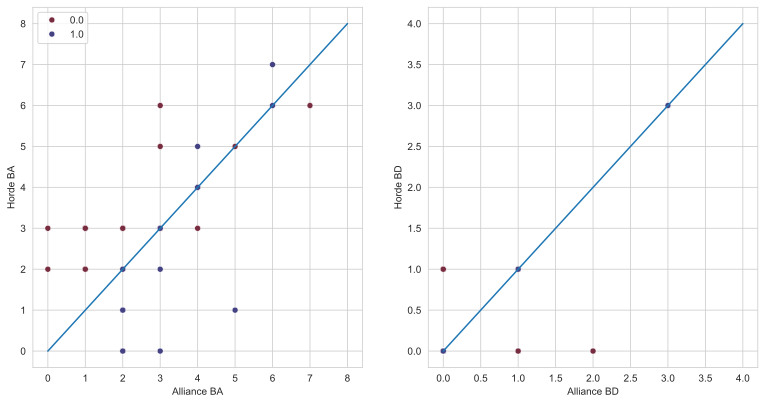

In [152]:
gil_matches = wowgil.pivot_table(values=['BA', 'BD'], index='Code', columns=['Faction'], aggfunc=lambda x: x.sum())
gil_matches.columns = [(col[1] + ' ' + col[0]) for col in gil_matches.columns]
gil_matches['Alliance Won'] = np.array(wowgil[wowgil['Faction'] == 'Alliance'].groupby(['Code'])['Win'].first())

fig, axs = plt.subplots(1, 2, figsize=(13, 6.5))

sns.scatterplot(ax=axs[0], x="Alliance BA", y="Horde BA",
                hue="Alliance Won", data=gil_matches, palette='icefire_r')
y = x = np.linspace(0, 8)
sns.lineplot(x=x, y=x, ax=axs[0])

sns.scatterplot(ax=axs[1], x="Alliance BD", y="Horde BD",
                hue="Alliance Won", data=gil_matches, palette="icefire_r", legend=False)
y = x = np.linspace(0, 4)
sns.lineplot(x=x, y=x, ax=axs[1])

plt.show()

Silvershard Mines is a race for resource Battleground, where you have to escort as many Captured Carts (CC) to your base as you can to pile up Silvershard diamonds. Note that Captured Cart itself doesn't instanly reward you with the resources until you get it to your faction depot. As we can see from the plot, we can divide match outcome classes quite precisely with just one hyperplane, but it won't guarantee 100% accuracy (in case you capture more carts, than your enemy, but fail to actually get of them to your base).

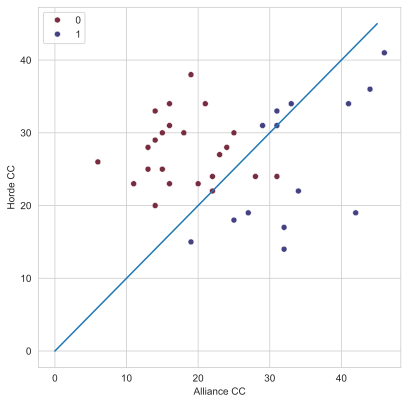

In [154]:
sm_matches = wowsm.pivot_table(values='CC', index='Code', columns='Faction', aggfunc=lambda x: x.sum())
sm_matches['Alliance Won'] = wowsm[wowsm['Faction'] == 'Alliance'].groupby(['Code'])['Win'].first().astype(int)
sm_matches.rename({'Alliance': 'Alliance CC', 'Horde': 'Horde CC'}, axis=1, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(6.5, 6.5))

sns.scatterplot(ax=ax, x="Alliance CC", y="Horde CC",
                hue="Alliance Won", data=sm_matches, palette='icefire_r')
y = x = np.linspace(0, 45)
sns.lineplot(x=x, y=x, ax=ax)

plt.show()

In Temple of Kotmogu you are fighting over magic orbs (OP) awarding their carriers with Victory Points (VP) over time, as well giving them specific buffs and debuffs; your ultimate goal is to get more points. OP metric proves to be completely unreliable, while VP shows unusual behavior. In most cases, winner's advantage is overwhelming, meaning this metric would give us incredible accuracy, requiring just one hyperplane to divide two classes.

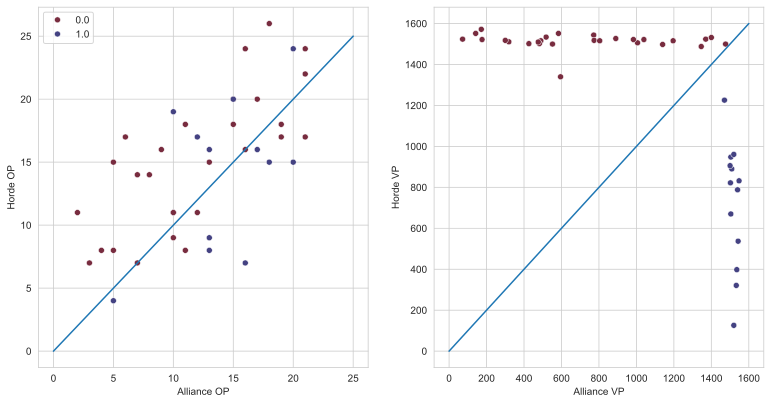

In [155]:
tk_matches = wowtk.pivot_table(values=['OP', 'VP'], index='Code', columns=['Faction'], aggfunc=lambda x: x.sum())
tk_matches.columns = [(col[1] + ' ' + col[0]) for col in tk_matches.columns]
tk_matches['Alliance Won'] = np.array(wowtk[wowtk['Faction'] == 'Alliance'].groupby(['Code'])['Win'].first())

fig, axs = plt.subplots(1, 2, figsize=(13, 6.5))

sns.scatterplot(ax=axs[0], x="Alliance OP", y="Horde OP",
                hue="Alliance Won", data=tk_matches, palette='icefire_r')
y = x = np.linspace(0, 25)
sns.lineplot(x=x, y=x, ax=axs[0])

sns.scatterplot(ax=axs[1], x="Alliance VP", y="Horde VP",
                hue="Alliance Won", data=tk_matches, palette="icefire_r", legend=False)
y = x = np.linspace(0, 1600)
sns.lineplot(x=x, y=x, ax=axs[1])

plt.show()

And finally, Warsong Gulch is your classic Capture the Flag. Flags Captures (FC) is the objective it self, so this metric is naturally 100% accurate; Flags Returned (FR) isn't bad though, showing just a few outliners.

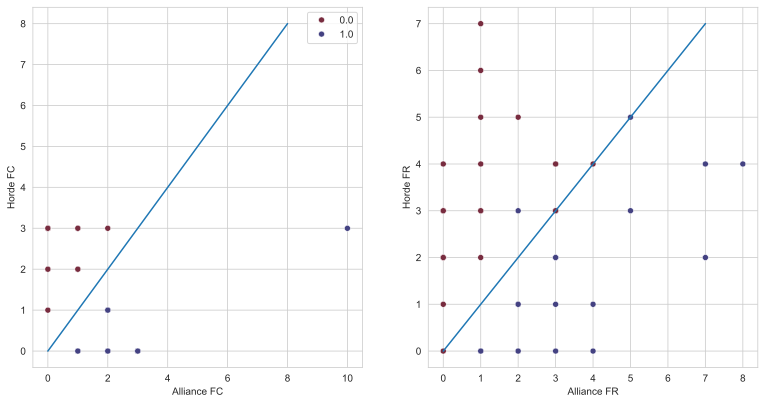

In [156]:
wg_matches = wowwg.pivot_table(values=['FC', 'FR'], index='Code', columns=['Faction'], aggfunc=lambda x: x.sum())
wg_matches.columns = [(col[1] + ' ' + col[0]) for col in wg_matches.columns]
wg_matches['Alliance Won'] = np.array(wowwg[wowwg['Faction'] == 'Alliance'].groupby(['Code'])['Win'].first())

fig, axs = plt.subplots(1, 2, figsize=(13, 6.5))

sns.scatterplot(ax=axs[0], x="Alliance FC", y="Horde FC",
                hue="Alliance Won", data=wg_matches, palette='icefire_r')
y = x = np.linspace(0, 8)
sns.lineplot(x=x, y=x, ax=axs[0])

sns.scatterplot(ax=axs[1], x="Alliance FR", y="Horde FR",
                hue="Alliance Won", data=wg_matches, palette="icefire_r", legend=False)
y = x = np.linspace(0, 7)
sns.lineplot(x=x, y=x, ax=axs[1])

plt.show()

Thank you for your attention, hope you found this kernel somewhat insightful and discovered something new with it. Stay tuned for more EDA notebooks.